# 3 Medical Data Visualizer

## 3.1 Problem Description

<p>In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.</p>

### Data description

<p>The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.</p>

<p>File name: medical_examination.csv</p>

In [228]:
import pandas as pd

In [229]:
df = pd.read_csv('medical_examination.csv')

In [230]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


### Tasks

<p>Create a chart similar to <code>examples/Figure_1.png</code>, where we show the counts of good and bad outcomes for the <code>cholesterol</code>, <code>gluc</code>, <code>alco</code>, <code>active</code>, and <code>smoke</code> variables for patients with cardio=1 and cardio=0 in different panels.</p>

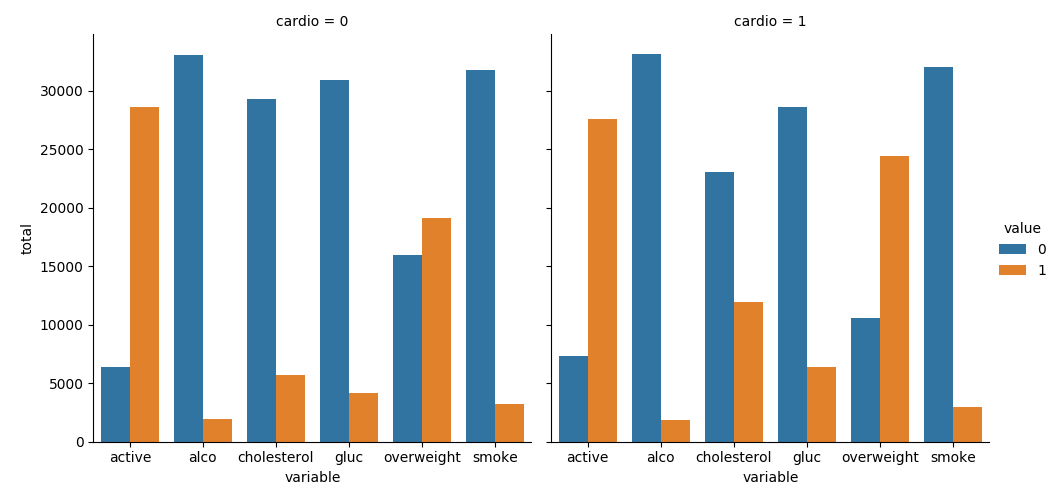

<p>Use the data to complete the following tasks in <code>medical_data_visualizer.py</code>:</p>


<ul>
<li>Add an <code>overweight</code> column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is &gt; 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.</li>
<li>Normalize the data by making 0 always good and 1 always bad. If the value of <code>cholesterol</code> or <code>gluc</code> is 1, make the value 0. If the value is more than 1, make the value 1.</li>
<li>Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's <code>catplot()</code>. The dataset should be split by 'Cardio' so there is one chart for each <code>cardio</code> value. The chart should look like <code>examples/Figure_1.png</code>.</li>
<li>Clean the data. Filter out the following patient segments that represent incorrect data:
<ul>
<li>diastolic pressure is higher than systolic (Keep the correct data with <code>(df['ap_lo'] &lt;= df['ap_hi'])</code>)</li>
<li>height is less than the 2.5th percentile (Keep the correct data with <code>(df['height'] &gt;= df['height'].quantile(0.025))</code>)</li>
<li>height is more than the 97.5th percentile</li>
<li>weight is less than the 2.5th percentile</li>
<li>weight is more than the 97.5th percentile</li>
</ul>
</li>
<li>Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's <code>heatmap()</code>. Mask the upper triangle. The chart should look like <code>examples/Figure_2.png</code>.</li>
</ul>

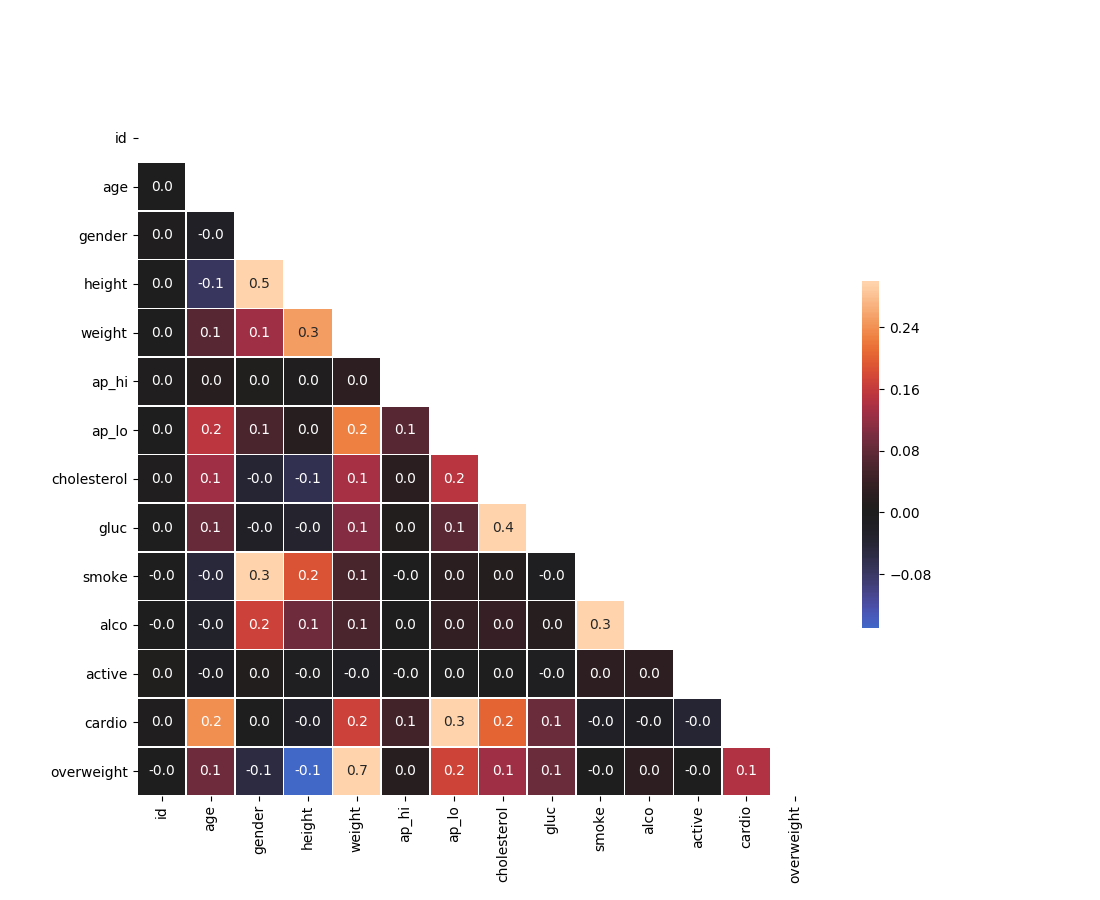

<p>Any time a variable is set to <code>None</code>, make sure to set it to the correct code.</p>

## 3.2 Problem Solution

In [231]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 3.2.1 Import Data

In [232]:
df = pd.read_csv('medical_examination.csv')

### 3.2.2 Add 'overweight' Column

In [233]:
df['overweight'] = np.where(df['weight'] / ((df['height']/100)*(df['height']/100)) > 25, 1, 0,)

### 3.2.3 Normalize Data 'cholesterol' and 'gluc'

In [234]:
df["cholesterol"] = np.where(df["cholesterol"] == 1, 0, 1)
df["gluc"] = np.where(df["gluc"] == 1, 0, 1)

### 3.2.3  Draw Categorical Plot

In [251]:
def draw_cat_plot():
    
    vars = sorted(["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])

    df_cat = pd.melt(
        df,
        id_vars=["cardio"],
        value_vars=vars,
    )
    
    df_cat = df_cat.value_counts().reset_index(name="total")
    
    fig = sns.catplot(data=
                      df_cat, 
                      x='variable', 
                      y='total', 
                      hue="value", 
                      col="cardio", 
                      kind="bar", 
                      order=vars,
    )
    
    fig
    
    return 

### 3.2.4 Draw Heat Map

In [252]:
def draw_heat_map():

    df_heat = df.loc[
        (df["ap_lo"] <= df["ap_hi"])
        & (df["height"] >= df["height"].quantile(0.025))
        & (df["height"] <= df["height"].quantile(0.975))
        & (df["weight"] >= df["weight"].quantile(0.025))
        & (df["weight"] <= df["weight"].quantile(0.975))
    ]

    corr = df_heat.corr()

    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    fig, ax = plt.subplots(figsize=(12, 9))

    ax = sns.heatmap(
        corr,
        mask=mask,
        vmax=0.4,
        square=True,
        fmt=".1f",
        annot=True,
    )
    
    fig

    return 

## 3.3 Testing

In [253]:
import unittest
import matplotlib as mpl

In [254]:
# the test case
class CatPlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = draw_cat_plot()
        self.ax = self.fig.axes[0]
    
    def test_line_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "variable"
        self.assertEqual(actual, expected, "Expected line plot xlabel to be 'variable'")
        actual = self.ax.get_ylabel()
        expected = "total"
        self.assertEqual(actual, expected, "Expected line plot ylabel to be 'total'")
        actual = []
        for label in self.ax.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']
        self.assertEqual(actual, expected, "Expected bar plot secondary x labels to be 'active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'")

    def test_bar_plot_number_of_bars(self):
        actual = len([rect for rect in self.ax.get_children() if isinstance(rect, mpl.patches.Rectangle)])
        expected = 13
        self.assertEqual(actual, expected, "Expected a different number of bars chart.")


class HeatMapTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = draw_heat_map()
        self.ax = self.fig.axes[0]

    def test_heat_map_labels(self):
        actual = []
        for label in self.ax.get_xticklabels():
          actual.append(label.get_text())
        expected = ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight']
        self.assertEqual(actual, expected, "Expected bar plot legend labels to be months of the year.")
    
    def test_heat_map_values(self):
        actual = [text.get_text() for text in self.ax.get_default_bbox_extra_artists() if isinstance(text, mpl.text.Text)]
        print(actual)
        expected = ['0.0', '0.0', '-0.0', '0.0', '-0.1', '0.5', '0.0', '0.1', '0.1', '0.3', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.2', '0.1', '0.0', '0.2', '0.1', '0.0', '0.1', '-0.0', '-0.1', '0.1', '0.0', '0.2', '0.0', '0.1', '-0.0', '-0.0', '0.1', '0.0', '0.1', '0.4', '-0.0', '-0.0', '0.3', '0.2', '0.1', '-0.0', '0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.2', '0.1', '0.1', '0.0', '0.0', '0.0', '0.0', '0.3', '0.0', '-0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.0', '0.0', '-0.0', '0.0', '0.0', '0.0', '0.2', '0.0', '-0.0', '0.2', '0.1', '0.3', '0.2', '0.1', '-0.0', '-0.0', '-0.0', '-0.0', '0.1', '-0.1', '-0.1', '0.7', '0.0', '0.2', '0.1', '0.1', '-0.0', '0.0', '-0.0', '0.1']
        self.assertEqual(actual, expected, "Expected different values in heat map.")

EEEE
ERROR: test_bar_plot_number_of_bars (__main__.CatPlotTestCase)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\Laonicus\AppData\Local\Temp\ipykernel_928\2713590628.py", line 5, in setUp
    self.ax = self.fig.axes[0]
AttributeError: 'NoneType' object has no attribute 'axes'

ERROR: test_line_plot_labels (__main__.CatPlotTestCase)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\Laonicus\AppData\Local\Temp\ipykernel_928\2713590628.py", line 5, in setUp
    self.ax = self.fig.axes[0]
AttributeError: 'NoneType' object has no attribute 'axes'

ERROR: test_heat_map_labels (__main__.HeatMapTestCase)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\Laonicus\AppData\Local\Temp\ipykernel_928\2713590628.py", line 29, in setUp
    self.ax = self.fig.axes[0]
AttributeError:

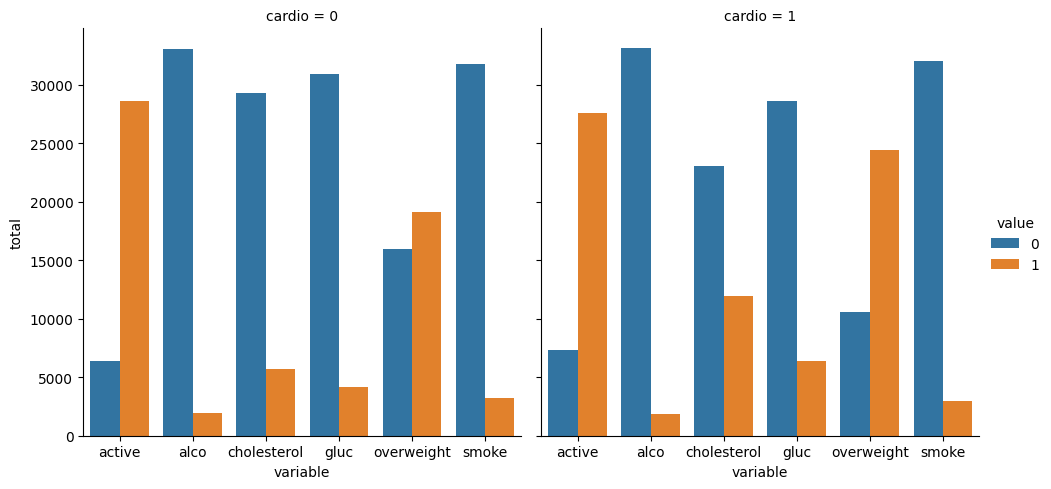

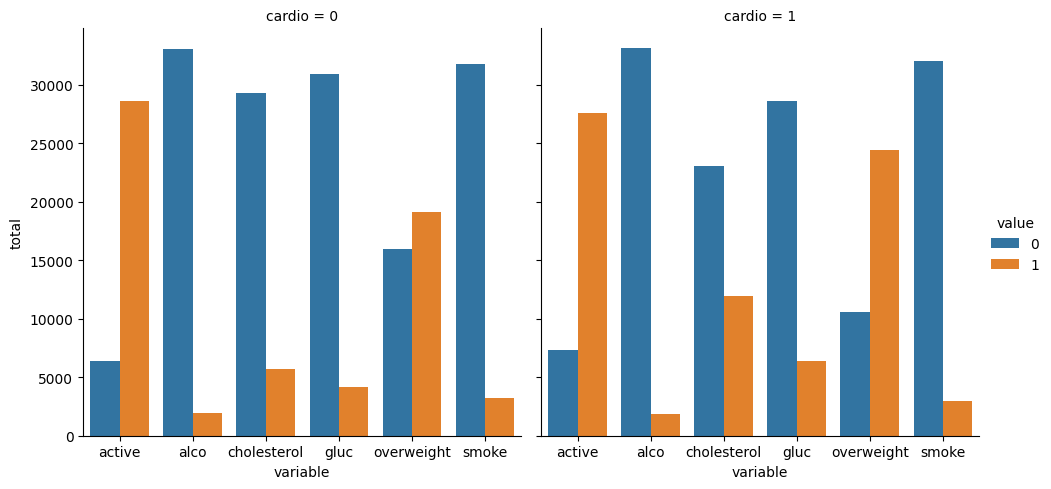

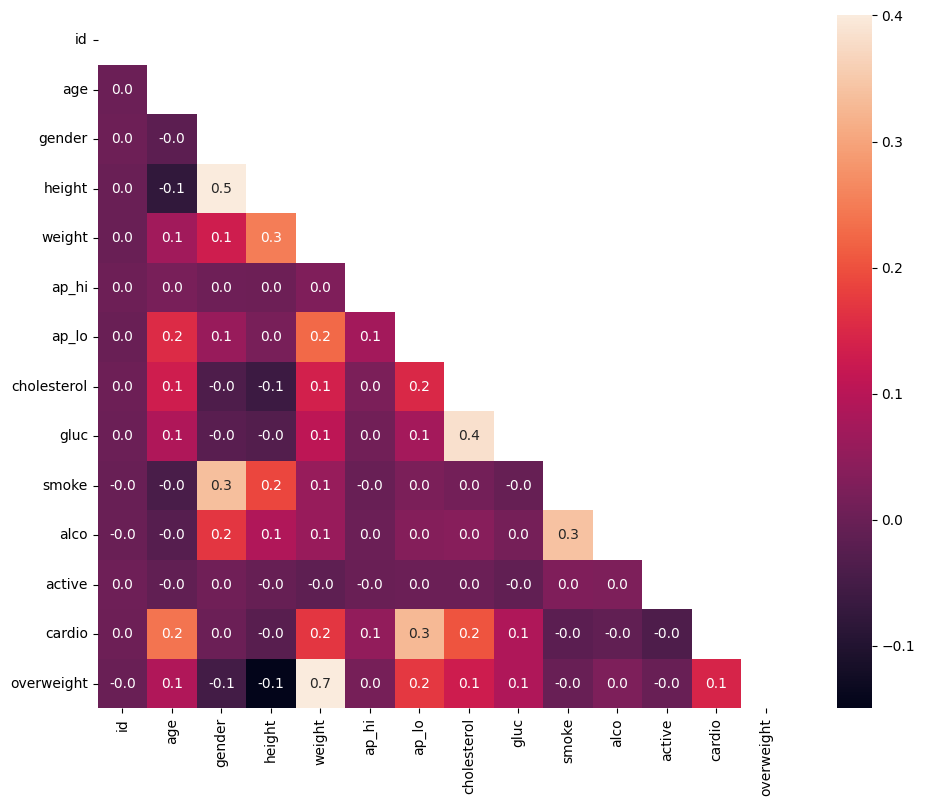

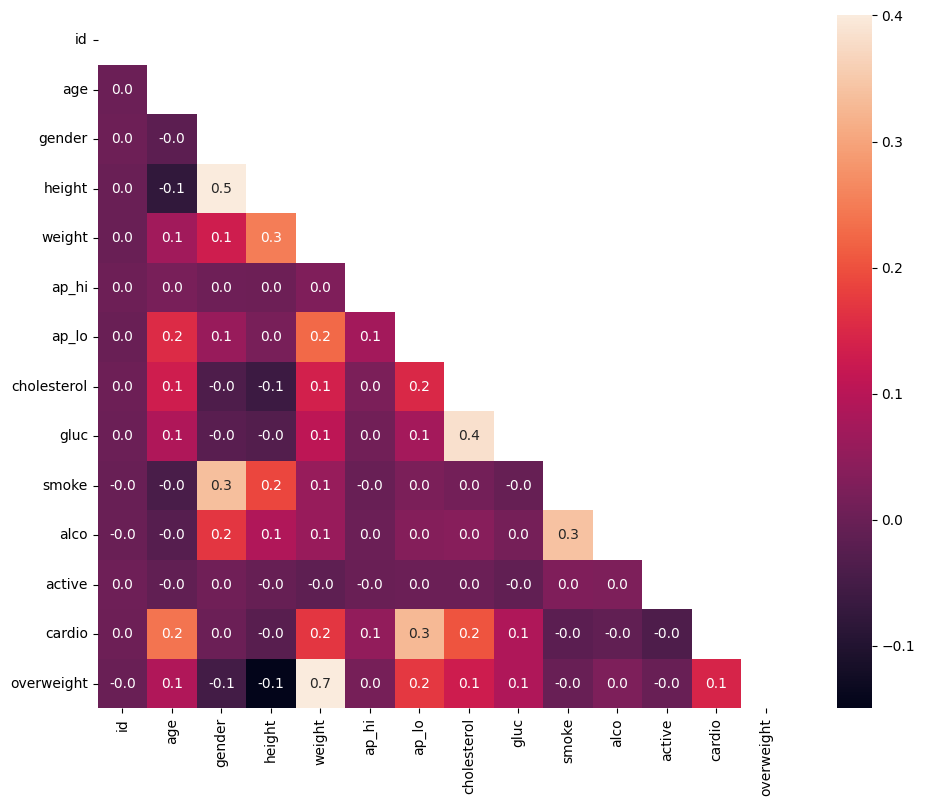

In [255]:
if __name__ == "__main__":
    unittest.main(argv=["first-arg-is-ignored"], exit=False)